<h3> Implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.</h3>
<h5>Name : Shubham Sonake</h5>
<h5>Reg No : 2021BIT047</h5>

<h5>Importing the required libraries</h5>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<h5>Importing the Dataset</h5>

In [4]:
data = pd.read_csv(r"Diabetes.csv")

<h5>Data Preproceesing</h5>

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h5>Identify missing values</h5>

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h5>Define Features and Targets</h5>

In [7]:
X = data.drop('Outcome', axis=1)  
y = data['Outcome']

<h5>Spilt The dataset into training and testing data</h5>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

<h5>Train a Decision Tree Classifier model</h5>

In [9]:
dectree_model = DecisionTreeClassifier()
dectree_model = dectree_model.fit(X_train,y_train)
dectree_model

DecisionTreeClassifier()

<h5>Train the Classification model</h5>

In [10]:
y_pred = dectree_model.predict(X_test)

In [11]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<h5>Defining features for visualising tree</h5>>

In [12]:
features=X.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<h5>Plotting tree</h5>

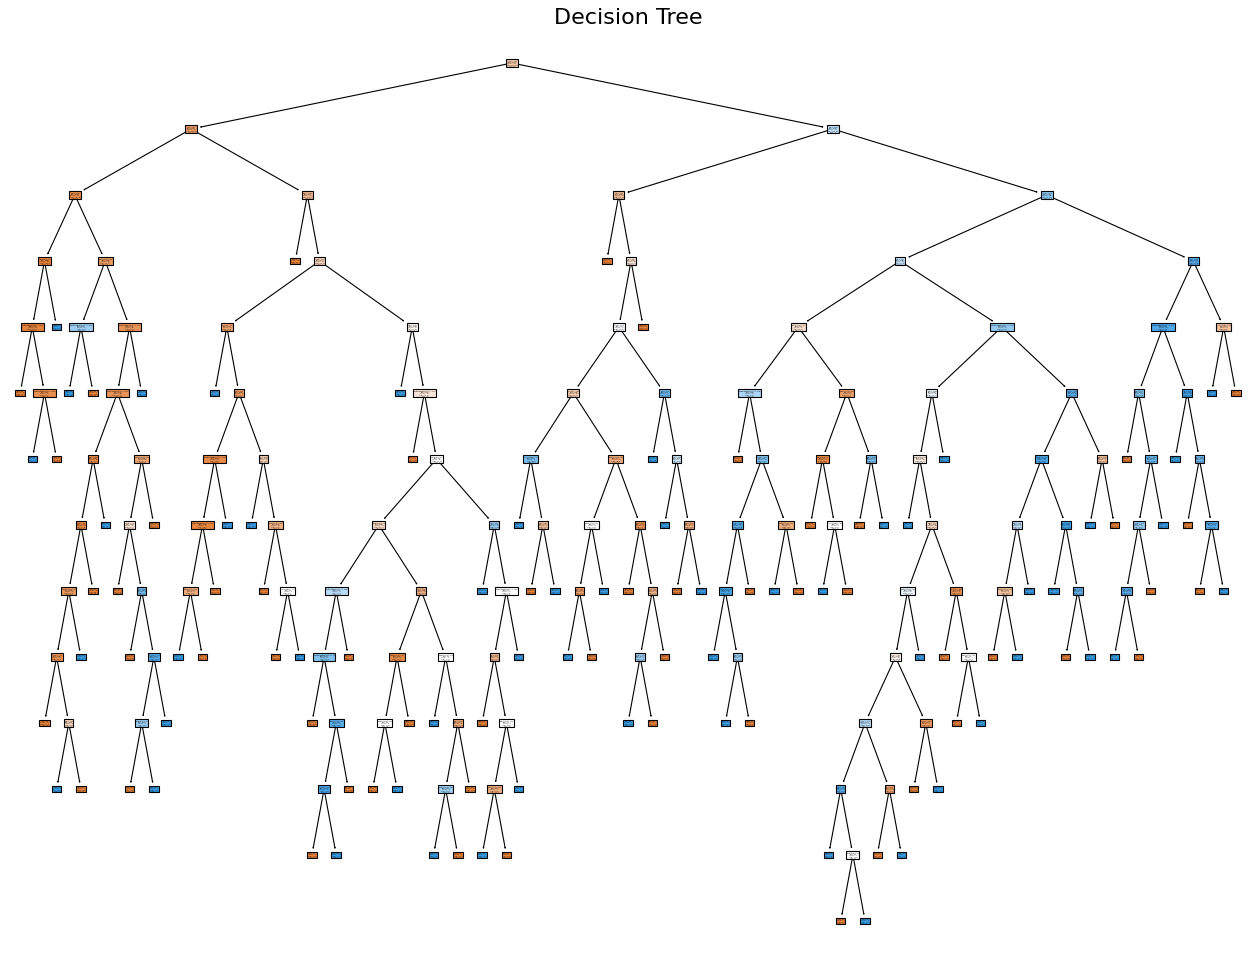

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi= 80)
class_labels = ['Negative', 'Positive']
plot_tree(dectree_model, filled=True, feature_names=list(features), class_names=['0', '1'])
plt.title("Decision Tree",fontsize=20)
plt.show()

In [17]:
dectree_model_1 = DecisionTreeClassifier(max_depth=3)
dectree_model_1 = dectree_model_1.fit(X_train,y_train)
dectree_model_1

DecisionTreeClassifier(max_depth=3)

<h5>Predict</h5>

In [19]:
y_pred = dectree_model_1.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

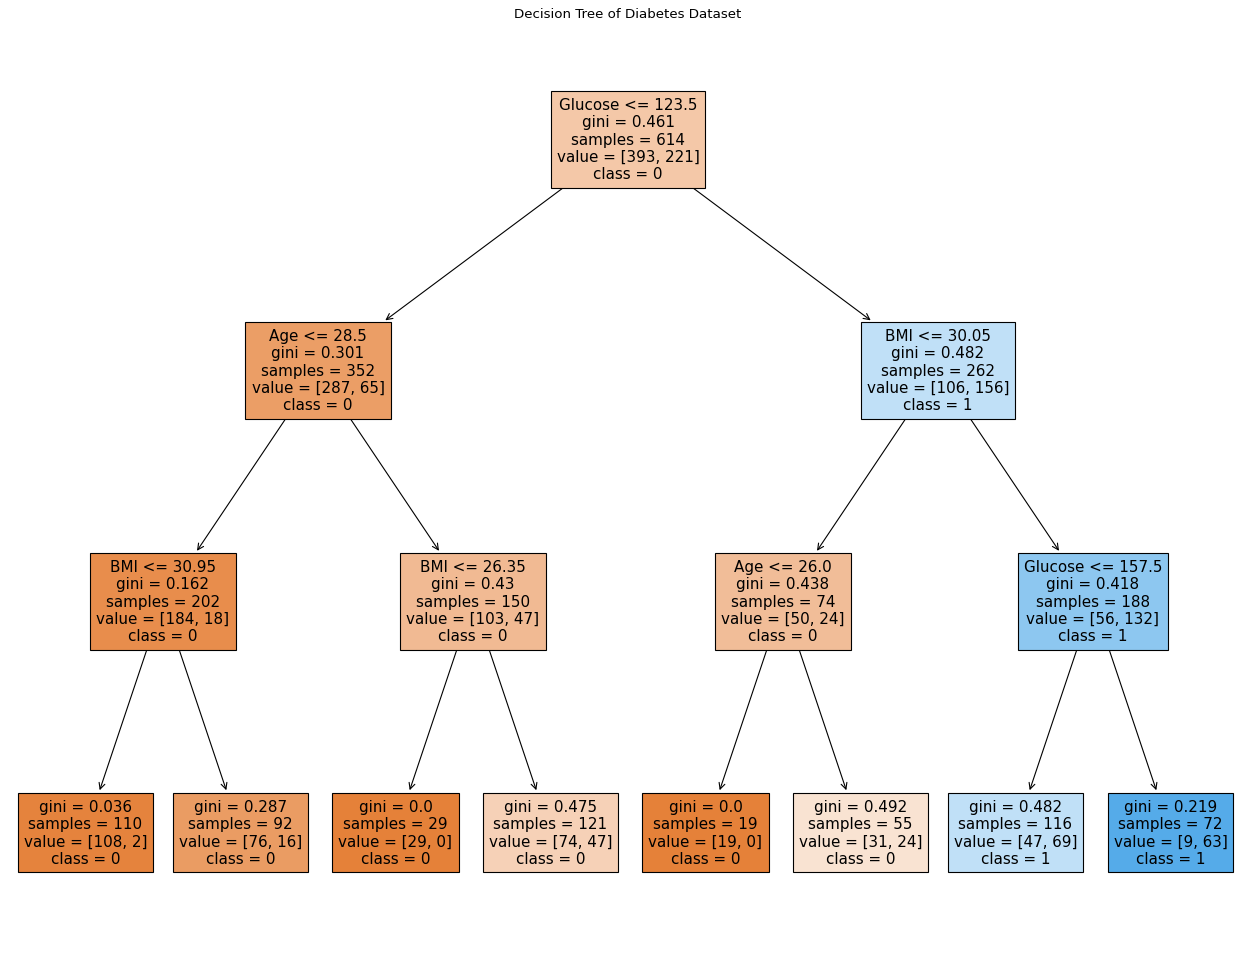

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi= 80)
class_labels = ['Negative', 'Positive']
plot_tree(dectree_model_1, filled=True, feature_names=list(features), class_names=['0', '1'])
plt.title("Decision Tree of Diabetes Dataset")
plt.show()

<h5>Evaluating the above Classifications</h5>

In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[93 14]
 [23 24]]


In [22]:
from sklearn.metrics import precision_score ,f1_score ,accuracy_score ,recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
print("Accuracy is",acc)
print("Precision is",prec)
print("Recall is",rec)
print("F1 score is",f1)

Accuracy is 0.7597402597402597
Precision is 0.631578947368421
Recall is 0.5106382978723404
F1 score is 0.5647058823529411


<h5>Classification Report</h5>

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



<h4>Enhancing the model with K fold Cross validation</h4>

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [31]:
Kn_model = KNeighborsClassifier() 
kfold = KFold(n_splits=5)
results = cross_val_score(Kn_model, X, y, cv=kfold)

In [32]:
print(results)

[0.72727273 0.69480519 0.73376623 0.76470588 0.69934641]


In [33]:
print(results.mean())

0.723979288685171


<h4>Enhancing the model with Grid Search Cross validation</h4>

In [34]:
from sklearn.model_selection import GridSearchCV


<h5>Defining parameters</h5>

In [36]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

In [38]:
grid = GridSearchCV(dectree_model, parameters, cv=10)
grid.fit(X, y)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

<h5>Results</h5>

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7057245386192755
{'criterion': 'entropy', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy')
